In [1]:
import numpy as np
import utils.dirutils as dd
import matplotlib.pyplot as plt
import os
import os.path
import fnmatch
import re
%matplotlib widget

In [2]:
cd ~/Data/tmp

/home/quojinhao/Data/tmp


In [7]:
ls **dt2e-5.h5

100000_L1con_test_dt2e-5.h5  5000_L1con_test_dt2e-5.h5
100000_L2con_test_dt2e-5.h5  5000_L2con_test_dt2e-5.h5
100000_L3con_test_dt2e-5.h5  5000_L3con_test_dt2e-5.h5
100000_L4con_test_dt2e-5.h5  5000_L4con_test_dt2e-5.h5
100000_L5con_test_dt2e-5.h5  5000_L5con_test_dt2e-5.h5
100000_L6con_test_dt2e-5.h5  5000_L6con_test_dt2e-5.h5
10000_L1con_test_dt2e-5.h5   55000_L1con_test_dt2e-5.h5
10000_L2con_test_dt2e-5.h5   55000_L2con_test_dt2e-5.h5
10000_L3con_test_dt2e-5.h5   55000_L3con_test_dt2e-5.h5
10000_L4con_test_dt2e-5.h5   55000_L4con_test_dt2e-5.h5
10000_L5con_test_dt2e-5.h5   55000_L5con_test_dt2e-5.h5
10000_L6con_test_dt2e-5.h5   55000_L6con_test_dt2e-5.h5
15000_L1con_test_dt2e-5.h5   60000_L1con_test_dt2e-5.h5
15000_L2con_test_dt2e-5.h5   60000_L2con_test_dt2e-5.h5
15000_L3con_test_dt2e-5.h5   60000_L3con_test_dt2e-5.h5
15000_L4con_test_dt2e-5.h5   60000_L4con_test_dt2e-5.h5
15000_L5con_test_dt2e-5.h5   60000_L5con_test_dt2e-5.h5
15000_L6con_test_dt2e-5.h5   60000_L6con_test_dt2e-5.h

In [10]:
includes = ['*0000_L1con_test_dt2e-5.h5'] # for files only
# includes = ['*0000L6*test.h5'] # for files only
excludes = [''] # for dirs and files

# transform glob patterns to regular expressions
includes = r'|'.join([fnmatch.translate(x) for x in includes])
excludes = r'|'.join([fnmatch.translate(x) for x in excludes]) or r'$.'

legends = [None]
for root, dirs, files in os.walk(os.getcwd()):
    
    # exclude/include files
    files = [os.path.join(root, f) for f in files]
    files = [f for f in files if re.match(includes, f)]
    files = [f for f in files if not re.match(excludes, f)]

sfiles = sorted(files, key=lambda x: int(x.split('/')[-1].split('L')[0][:-1]))



In [11]:
sfiles

['/home/quojinhao/Data/tmp/10000_L1con_test_dt2e-5.h5',
 '/home/quojinhao/Data/tmp/20000_L1con_test_dt2e-5.h5',
 '/home/quojinhao/Data/tmp/30000_L1con_test_dt2e-5.h5',
 '/home/quojinhao/Data/tmp/40000_L1con_test_dt2e-5.h5',
 '/home/quojinhao/Data/tmp/50000_L1con_test_dt2e-5.h5',
 '/home/quojinhao/Data/tmp/60000_L1con_test_dt2e-5.h5',
 '/home/quojinhao/Data/tmp/70000_L1con_test_dt2e-5.h5',
 '/home/quojinhao/Data/tmp/80000_L1con_test_dt2e-5.h5',
 '/home/quojinhao/Data/tmp/90000_L1con_test_dt2e-5.h5',
 '/home/quojinhao/Data/tmp/100000_L1con_test_dt2e-5.h5']

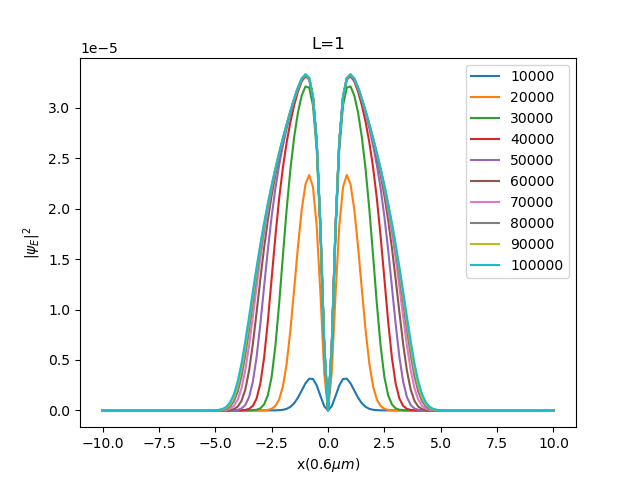

In [12]:
legends = []
plt.figure()
for file in sfiles:
    data = dd.retrieve(file)
    Lx = data['Lx']
    Nx = data['Nx']
    Ly = data['Ly']
    Ny = data['Ny']
    Lz = data['Lz']
    Nz = data['Nz']
    x = np.linspace(-Lx, Lx, Nx)
    y = np.linspace(-Ly, Ly, Ny)
    z = np.linspace(-Lz, Lz, Nz)
    dx = np.diff(x)[0]
    dy = np.diff(y)[0]
    dz = np.diff(z)[0]
    psiE = data['psiE']
    plt.plot(x, np.abs(psiE[60,:,60])**2*dx*dy*dz)
    legends.append(file.split('/')[-1].split('L')[0][:-1])
L = dd.retrieve(sfiles[0])['L']
plt.title(f"L={L}")
plt.xlabel(r'x($0.6\mu m$)')
plt.ylabel(r'$|\psi_{E}|^{2}$')
plt.legend(legends)
plt.show()

In [13]:
path1 = "100000_L1con_test_dt2e-5.h5"
data1 = dd.retrieve(path1)
conG1 = data1['convergeG']
conE1 = data1['convergeE']
dw1 = data1['dw']
stepJ1 = data1['stepJ']
n1 = data1['nj']
# path2 = "/home/quojinhao/Data/con_test/100000L1con_test_dt10x.h5"
# data2 = dd.retrieve(path2)
# conG2 = data2['convergeG']
# conE2 = data2['convergeE']
# dw2 = data2['dw']
# stepJ2 = data2['stepJ']
# n2 = data2['nj']


In [ ]:
plt.figure()
Lx = data1['Lx']
Nx = data1['Nx']
Ly = data1['Ly']
Ny = data1['Ny']
Lz = data1['Lz']
Nz = data1['Nz']
x = np.linspace(-Lx, Lx, Nx)
y = np.linspace(-Ly, Ly, Ny)
z = np.linspace(-Lz, Lz, Nz)
dx = np.diff(x)[0]
dy = np.diff(y)[0]
dz = np.diff(z)[0]
psiE = data1['psiE']
plt.plot(x, np.abs(psiE[60,:,60])**2*dx*dy*dz)
Lx = data2['Lx']
Nx = data2['Nx']
Ly = data2['Ly']
Ny = data2['Ny']
Lz = data2['Lz']
Nz = data2['Nz']
x = np.linspace(-Lx, Lx, Nx)
y = np.linspace(-Ly, Ly, Ny)
z = np.linspace(-Lz, Lz, Nz)
dx = np.diff(x)[0]
dy = np.diff(y)[0]
dz = np.diff(z)[0]
psiE = data2['psiE']
plt.plot(x, np.abs(psiE[60,:,60])**2*dx*dy*dz)
plt.legend(['1e-4 at 10K-th step','1e-5 at 100K-th step'])
plt.xlabel(r'x($0.6\mu m$)')
plt.ylabel(r'$|\psi_{E}|^{2}$')
plt.show()

In [ ]:
path1 = "100000_L1_dt1e-4.h5"
data1 = dd.retrieve(path1)

Lx = data['Lx']
Nx = data['Nx']
Ly = data['Ly']
Ny = data['Ny']
Lz = data['Lz']
Nz = data['Nz']
x = np.linspace(-Lx, Lx, Nx)
y = np.linspace(-Ly, Ly, Ny)
z = np.linspace(-Lz, Lz, Nz)
dx = np.diff(x)[0]
dy = np.diff(y)[0]
dz = np.diff(z)[0]
psiE = data['psiE']
LG = data['LG']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, np.abs(LG[60,:,60])**2, 'g-')
ax2.plot(x, np.abs(psiE[60,:,60])**2*dx*dy*dz, 'b-')

ax1.set_xlabel(r'x($0.6\mu m$)')
ax1.set_ylabel(r'$|LG|^{2}$', color='g')
ax2.set_ylabel(r'$|\psi_{E}|^{2}$', color='b')

plt.show()


Text(0, 0.5, 'Relative error')

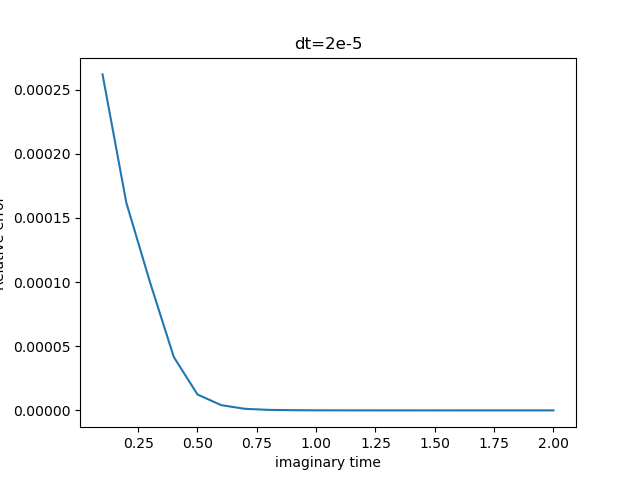

In [14]:


plt.figure()
plt.title('dt=2e-5')
x = np.arange(stepJ1,n1+1,stepJ1)*dw1
plt.plot(x,conE1[1:])
plt.xlabel("imaginary time")
plt.ylabel("Relative error")



In [ ]:
plt.figure()
x = np.arange(stepJ1,n1+1,stepJ1)*dw1
plt.plot(x,conE1[1:])
plt.xlabel("imaginary time")
plt.ylabel("Relative error")

plt.show()


In [ ]:
plt.close()

In [ ]:
import utils.plotter as pp
%matplotlib widget

In [ ]:
path = "/home/quojinhao/Data/tmp/10000_L1_dt1e-4.h5"
pp.plotdata(path,zindice=[45,55,60,65,75] ,lims=[(45,75),(45,75),(45,75)], plotwhat='phase')

In [ ]:
path = "/home/quojinhao/Data/con_test/100000L1con_test_dt10x.h5"
pp.plotdata(path,zindice=[45,55,60,65,75] ,lims=[(45,75),(45,75),(45,75)], plotwhat='phase')

In [ ]:
path = "/home/quojinhao/Data/con_test/100000L1con_test_dt10x.h5"
data = dd.retrieve(path)
data['j']